In [1]:
from size_based_ecosystem import *
import imageio as imgio

In [2]:
new_spectral = spectral_method(30, 200)

In [3]:
def expander(old_spectral, new_spectral, transform_vec):
    length = old_spectral.x[-1]
    coeffs = np.linalg.inv(eco.spectral.JacobiP_n(2*old_spectral.x/length - 1, 0, 0, old_spectral.n).T) @ transform_vec
    transformer = new_spectral.JacobiP_n(2*new_spectral.x/new_spectral.x[-1] - 1, 0, 0, old_spectral.n).T
    return transformer @ coeffs

In [4]:
import matplotlib.pyplot as plt
import pickle as pkl
import imageio as imageio
frames_path = "images/images" + "{i}.jpg"
gif_path = "images/test_gif.gif"

In [5]:
with open('data/strategies_one_year.pkl', 'rb') as f:
    strategies = pkl.load(f)
with open('data/population_one_year.pkl', 'rb') as f:
    populations = pkl.load(f)
with open('data/eco_one_year.pkl', 'rb') as f:
    eco = pkl.load(f)
with open('data/resource_one_year.pkl', 'rb') as f:
    resources = pkl.load(f)
with open('data/periodic_layers_one_year.pkl', 'rb') as f:
    periodic_layers = pkl.load(f)
with open('data/losses_one_year.pkl', 'rb') as f:
    losses = pkl.load(f)
with open('data/rewards_one_year.pkl', 'rb') as f:
    rewards = pkl.load(f)


time = np.linspace(0,365,len(populations))
populations = np.array(populations)
populations = np.array(populations)


In [6]:
with open('data/strategies_one_year.pkl', 'rb') as f:
    strategies_more_resources = pkl.load(f)
with open('data/population_one_year.pkl', 'rb') as f:
    populations_more_resources = pkl.load(f)
with open('data/eco_one_year.pkl', 'rb') as f:
    eco_more_resources = pkl.load(f)
with open('data/resource_one_year.pkl', 'rb') as f:
    resources_more_resources = pkl.load(f)
with open('data/periodic_layers_one_year.pkl', 'rb') as f:
    periodic_layers_more_resources = pkl.load(f)
with open('data/losses_one_year.pkl', 'rb') as f:
    losses_more_resources = pkl.load(f)
with open('data/rewards_one_year.pkl', 'rb') as f:
    rewards_more_resources = pkl.load(f)
    
populations_more_resources = np.array(populations_more_resources)


In [7]:

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120), 
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150), 
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148), 
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199), 
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)



In [8]:
day_interval = 96
day = int(70*day_interval)
time_step = 1/day_interval
eco_params_orig = ecosystem_parameters(eco.parameters.mass_vector, eco.spectral)
OG_layered_attack = eco_params_orig.layered_attack.copy()
flows = np.zeros((day_interval, 2))

flows_more_res = np.zeros((day_interval, 2))

for i in range(day, day+day_interval):
    layered_attack = periodic_layers[i-day]
    T_G = graph_builder(eco, layered_attack = layered_attack, 
                  populations=populations[i], resources = resources[i], 
                  strategies = strategies[i])
    flows[i-(day), 0] = T_G[1,0]
    flows[i-(day), 1] = T_G[2,1]
    TG_M_R = graph_builder(eco, layered_attack = layered_attack, 
                  populations=populations_more_resources[i], resources = resources_more_resources[i], 
                  strategies = strategies_more_resources[i])
    
    flows_more_res[i-(day), 0] = T_G[1,0]
    flows_more_res[i-(day), 1] = T_G[2,1]


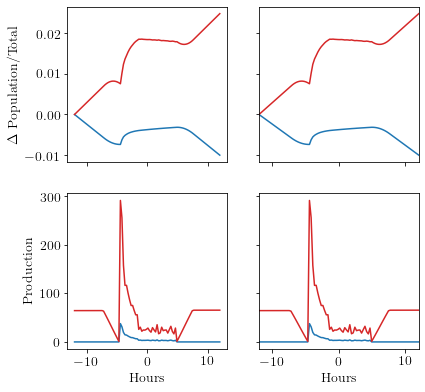

In [9]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey = 'row')
fig.set_size_inches((16/2.54, 16/2.54))

ax[0,1].plot(np.linspace(-12,12,day_interval), (populations[day:day+day_interval,0] - populations[day,0])/populations[day,0], color = tableau20[0], label = '20g fish')
ax[0,1].plot(np.linspace(-12,12,day_interval), (populations[day:day+day_interval,1] - populations[day,1])/populations[day,1], color = tableau20[6], label = '8000g fish')

ax[0,0].plot(np.linspace(-12,12,day_interval), (populations_more_resources[day:day+day_interval,0] - populations_more_resources[day,0])/populations_more_resources[day,0], color = tableau20[0], label = '20g fish')
ax[0,0].plot(np.linspace(-12,12,day_interval), (populations_more_resources[day:day+day_interval,1] - populations_more_resources[day,1])/populations_more_resources[day,1], color = tableau20[6], label = '8000g fish')



ax[1,1].plot(np.linspace(-12,12,day_interval), (flows[:,0]), color = tableau20[0], label = '20g fish')
ax[1,1].plot(np.linspace(-12,12,day_interval), (flows[:,1]), color = tableau20[6], label = '8000g fish')

ax[1,0].plot(np.linspace(-12,12,day_interval), (flows_more_res[:,0]), color = tableau20[0], label = '20g fish')
ax[1,0].plot(np.linspace(-12,12,day_interval), (flows_more_res[:,1]), color = tableau20[6], label = '8000g fish')



ax[1, 0].set_ylabel('Production')
ax[0, 0].set_ylabel('$\Delta$ Population/Total')
ax[-1,0].set_xlabel("Hours")
ax[1,-1].set_xlabel("Hours")
ax[1,-1].set_xlim((-12,12))

plt.savefig("pop_dyn_cons_short.png")

In [10]:
np.sum(np.isnan(np.array(strategies_more_resources)))

0

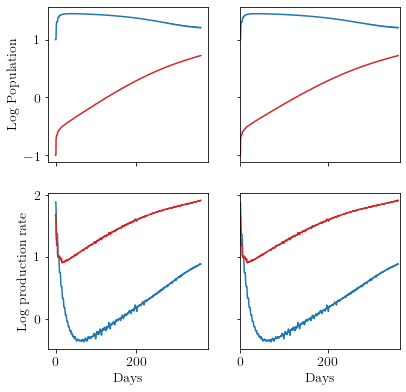

In [11]:
def moving_average(a, n=day_interval) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

m_a = day_interval
m_a_end = m_a - 1

time = np.linspace(0, 365, len(strategies))

eco_params_orig = ecosystem_parameters(eco.parameters.mass_vector, eco.spectral)
OG_layered_attack = eco_params_orig.layered_attack.copy()
flows_long = np.zeros((len(strategies), 2))
flows_long_more_res = np.zeros((len(strategies), 2))

for i in range(0, len(strategies)):
    layered_attack = periodic_layers[i % day_interval]
    T_G = graph_builder(eco, layered_attack = layered_attack, 
                  populations=populations[i], resources = resources[i], 
                  strategies = strategies[i])
    flows_long[i, 0] = T_G[1,0]
    flows_long[i, 1] = T_G[2,1]
    
    TG_M_R = graph_builder(eco, layered_attack = layered_attack, 
                  populations=populations_more_resources[i], resources = resources_more_resources[i], 
                  strategies = strategies_more_resources[i])
    
    flows_long_more_res[i, 0] = TG_M_R[1,0]
    flows_long_more_res[i, 1] = TG_M_R[2,1]


fig, ax = plt.subplots(2, 2, sharex='col', sharey = 'row')
fig.set_size_inches((16/2.54, 16/2.54))

ax[0,1].plot(time[0:-m_a_end], np.log10(populations[0:-m_a_end,0]), color = tableau20[0], label = '20g fish')
ax[0,1].plot(time[0:-m_a_end], np.log10(populations[0:-m_a_end,1]), color = tableau20[6], label = '8000g fish')
ax[1,1].plot(time[0:-m_a_end], np.log10(moving_average(flows_long[:,0])), color = tableau20[0], label = '20g fish')
ax[1,1].plot(time[0:-m_a_end], np.log10(moving_average(flows_long[:,1])), color = tableau20[6], label = '8000g fish')

ax[0,0].plot(time[0:-m_a_end], np.log10(populations_more_resources[0:-m_a_end,0]), color = tableau20[0], label = '20g fish')
ax[0,0].plot(time[0:-m_a_end], np.log10(populations_more_resources[0:-m_a_end,1]), color = tableau20[6], label = '8000g fish')
ax[1,0].plot(time[0:-m_a_end], np.log10(moving_average(flows_long_more_res[:,0])), color = tableau20[0], label = '20g fish')
ax[1,0].plot(time[0:-m_a_end], np.log10(moving_average(flows_long_more_res[:,1])), color = tableau20[6], label = '8000g fish')



ax[1, 0].set_ylabel('Log production rate')

ax[0, 0].set_ylabel('Log Population')
ax[-1,0].set_xlabel("Days")
ax[1,-1].set_xlabel("Days")

ax[1,-1].set_xlim((0,365))

plt.savefig("pop_dyn_cons_long.png")

In [34]:
eco.populations

array([16.06104342,  5.38745806])

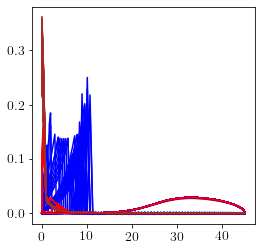

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(4,4))
for i in range(day,day+day_interval):
    plt.plot(eco.spectral.x, np.diff(np.cumsum(eco.spectral.M @ (strategies[i][0]@eco.heat_kernels[0])), prepend = np.array([0])), color = 'blue')
    plt.plot(eco.spectral.x, np.diff(np.cumsum(eco.spectral.M @ (strategies[i][1]@eco.heat_kernels[0])), prepend = np.array([0])), color = 'red')
    plt.plot(eco.spectral.x, resources[i], color = 'brown')
plt.show()
plt.savefig("mess_distributions.pdf")

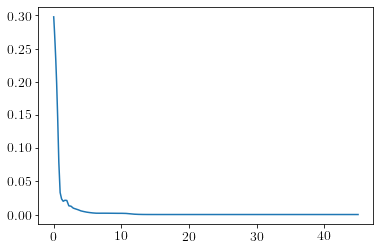

In [32]:
plt.plot(eco.spectral.x, resources[day])

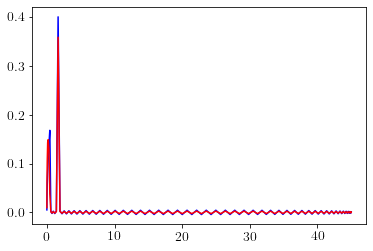

In [14]:
    plt.plot(eco.spectral.x, np.diff(np.cumsum(eco.spectral.M @ (strategies[33][0]@eco.heat_kernels[0])), prepend = np.array([0])), color = 'blue')
    plt.plot(eco.spectral.x, np.diff(np.cumsum(eco.spectral.M @ (strategies[33][1]@eco.heat_kernels[0])), prepend = np.array([0])), color = 'red')


In [15]:
np.diff(np.cumsum(eco.spectral.M @ (strategies[i][0]@eco.heat_kernels[0])), prepend = np.array([0])) @ eco.spectral.M @ (eco.parameters.layered_attack[:,1,0] * np.diff(np.cumsum(eco.spectral.M @ (strategies[i][1]@eco.heat_kernels[0])), prepend = np.array([0])))

1.614031427542496e-05

In [16]:
strategies[i][0]@eco.heat_kernels[0] @ eco.spectral.M @ (eco.parameters.layered_attack[:,1,0] * strategies[i][1]@eco.heat_kernels[0])

5.083294513599773e-05

In [17]:
cumsum = np.block([[np.zeros(eco.layers)], [np.tril((np.ones((eco.layers, eco.layers))))]])
diff = np.identity(eco.layers+1)-np.diag(np.ones(eco.layers), k = -1)
proj = np.block([[np.zeros(eco.layers)], [np.identity(eco.layers)]])
proj = proj.T


In [18]:
(diff @ cumsum @ (eco.spectral.M @ (strategies[i][1]@eco.heat_kernels[0])))[1:] - np.diff(np.cumsum(eco.spectral.M @ (strategies[i][1]@eco.heat_kernels[0])), prepend = np.array([0]))

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.71050543e-20,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.08420217e-19,  0.00000000e+00,  4.33680869e-19,
        2.16840434e-19, -2.16840434e-19,  0.00000000e+00,  4.33680869e-19,
        6.50521303e-19, -8.67361738e-19,  4.33680869e-19, -8.67361738e-19,
        8.67361738e-19,  1.73472348e-18, -3.46944695e-18, -1.73472348e-18,
        1.73472348e-18,  0.00000000e+00,  1.73472348e-18,  5.20417043e-18,
        6.93889390e-18,  

In [19]:
A = np.zeros(200)
A[30] = 1
B = np.zeros(200)
B[23] = 1

In [20]:
smoothing_operator_4_real = proj @ diff @ cumsum @ eco.spectral.M

In [21]:
smoothing_operator_4_real @ (strategies[i][1]@eco.heat_kernels[0])

array([3.71428029e-06, 2.27681847e-05, 4.02316631e-05, 5.63712964e-05,
       7.01457435e-05, 8.03855868e-05, 8.43982313e-05, 7.73851699e-05,
       5.41956560e-05, 3.33415297e-05, 3.07479849e-05, 3.36458240e-05,
       3.66471630e-05, 4.03501719e-05, 4.04039099e-05, 4.41907738e-05,
       4.47060817e-05, 4.91592706e-05, 5.26338782e-05, 5.77312484e-05,
       6.37625238e-05, 7.06836534e-05, 8.01831761e-05, 9.07685372e-05,
       1.04798224e-04, 1.22933615e-04, 1.45310427e-04, 1.72795197e-04,
       2.05995084e-04, 2.45000860e-04, 2.95265916e-04, 3.53226484e-04,
       4.23841792e-04, 4.98423812e-04, 5.88596714e-04, 7.07106520e-04,
       8.57593715e-04, 1.04508838e-03, 1.27658505e-03, 1.56058709e-03,
       1.90756231e-03, 2.32939068e-03, 2.83966222e-03, 3.45282985e-03,
       4.18405890e-03, 5.04775069e-03, 6.05662872e-03, 7.21944367e-03,
       8.53936774e-03, 1.00113723e-02, 1.16209564e-02, 1.33427501e-02,
       1.51414162e-02, 1.69731263e-02, 1.87894611e-02, 2.05412423e-02,
      

In [22]:
from mpl_toolkits.axes_grid1 import ImageGrid

def heatmap_plotter(data, image_name, ext):
    fig = plt.figure(figsize=(16/2.54, 16/2.54))

    grid = ImageGrid(fig, 111,  # as in plt.subplot(111)
                     nrows_ncols=(1, len(data)),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="5%",
                     cbar_pad=0.05,
                     )

    # Add data to image grid
    i = 0
    for ax in grid:
        im = ax.imshow(data[i], vmin=0, cmap='seismic', extent=ext)
        x0, x1 = ax.get_xlim()
        y0, y1 = ax.get_ylim()
        ax.set_aspect((x1 - x0) / (y1 - y0))
        ax.set_xlabel("Time (Hours)")
        ax.set_ylabel("Depth (m)")

        i += 1

    # Colorbar
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible

    #fig.colorbar(im, cax=cax)

    plt.savefig(image_name+".png", bbox_inches='tight')



/home/jaem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


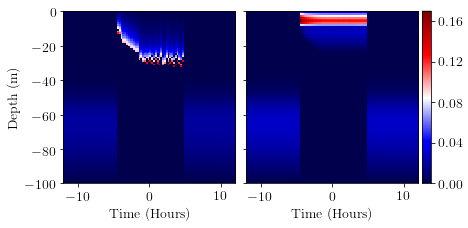

In [23]:
HM_C = np.zeros((eco.spectral.n, m_a))
HM_P = np.zeros((eco.spectral.n, m_a))
for i in range(day,day+day_interval):
    HM_C[:, i-(day)] = np.diff(np.cumsum(eco.spectral.M @ (strategies[i][0]@eco.heat_kernels[0])), prepend = np.array([0]))
    HM_P[:, i-(day)] = np.diff(np.cumsum(eco.spectral.M @ (strategies[i][1]@eco.heat_kernels[0])), prepend = np.array([0]))
heatmap_plotter([HM_C, HM_P], "heatmaps", [-12, 12, -100, 0])

/home/jaem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


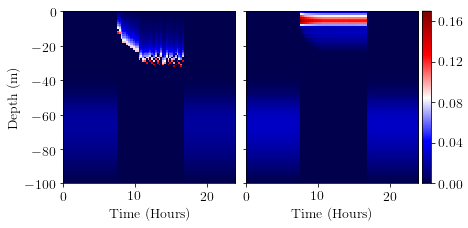

In [24]:
HM_C_MR = np.zeros((eco.spectral.n, m_a))
HM_P_MR = np.zeros((eco.spectral.n, m_a))
for i in range(day,day+day_interval):
    HM_C_MR[:, i-(day)] = np.diff(np.cumsum(eco.spectral.M @ (strategies_more_resources[i][0]@eco.heat_kernels[0])), prepend = np.array([0]))
    HM_P_MR[:, i-(day)] = np.diff(np.cumsum(eco.spectral.M @ (strategies_more_resources[i][1]@eco.heat_kernels[0])), prepend = np.array([0]))
heatmap_plotter([HM_C_MR, HM_P_MR], "heatmaps_MR", [0, 24, -100, 0])

In [25]:
new_spectral_obj = spectral_method(30, 120, segments = 1)

In [26]:
for i in range(day,day+day_interval):
    plt.figure(figsize=(4,4))
    plt.title("Sunlight:" + str(1/2*(1+min(max((2+1)*np.cos(i*2*np.pi/day_interval), -1), 1))))
    plt.plot(eco.spectral.x*3.3, np.diff(np.cumsum(eco.spectral.M @ (strategies[i][0]@eco.heat_kernels[0])), prepend = np.array([0])), color = 'blue')
    plt.plot(eco.spectral.x*3.3, np.diff(np.cumsum(eco.spectral.M @ (strategies[i][1]@eco.heat_kernels[0])), prepend = np.array([0])), color = 'red')
    plt.plot(eco.spectral.x*3.3,  np.diff(np.cumsum(eco.spectral.M @ resources[i]) , append = np.array([0])))
    plt.ylim((0,1))
    plt.savefig("images/images" + str(i) +".jpg")

    plt.close()

In [27]:
with imgio.get_writer(gif_path, mode='I', fps = 5) as writer:
    for i in range(day, day+day_interval):
        writer.append_data(imgio.imread(frames_path.format(i=i)))

/home/jaem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


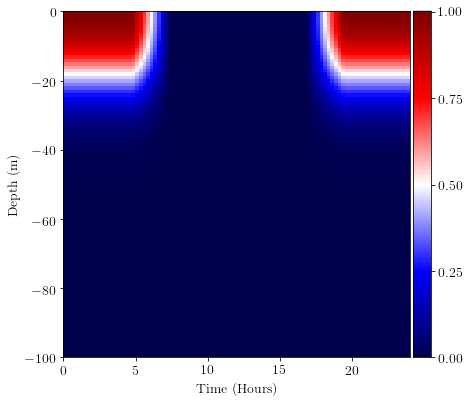

In [28]:
LD_LA = np.zeros((eco.spectral.n, m_a))
for i in range(day,day+day_interval):
    LD_LA[:, i-(day)] = periodic_layers[i-(day)][:,1,0]
heatmap_plotter([LD_LA], "heatmaps_LA", [0, 24, -100, 0])

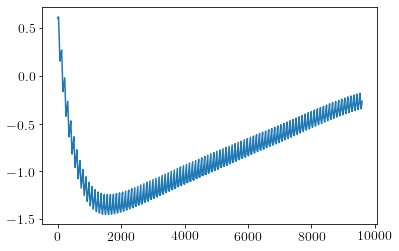

In [29]:
plt.plot(np.log10(np.sum(np.array(resources) @ eco.spectral.M, axis = 1)))

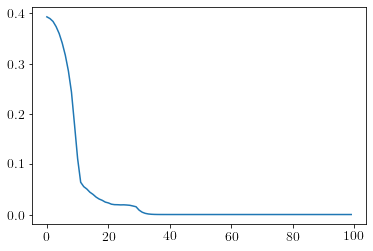

In [33]:
plt.plot(eco.water.res_counts)

In [31]:
np.sum(theoretical_max @ eco.spectral.M)

NameError: name 'theoretical_max' is not defined